<a href="https://colab.research.google.com/github/lakshmipriya-ragupathi/ml_algorithms/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA COLLECTION**

Aim: no. of clusters = 28

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, show
from google.colab import drive

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/DAY-7/Absenteeism_at_work.csv"

df = pd.read_csv(path, sep=';')
print(df.head())
print(df.info())
print(df.isnull().sum())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0 

In [4]:
sec_df = df.drop(['Reason for absence'], axis = 1)
print(sec_df)

     ID  Month of absence  Day of the week  Seasons  Transportation expense  \
0    11                 7                3        1                     289   
1    36                 7                3        1                     118   
2     3                 7                4        1                     179   
3     7                 7                5        1                     279   
4    11                 7                5        1                     289   
..   ..               ...              ...      ...                     ...   
735  11                 7                3        1                     289   
736   1                 7                3        1                     235   
737   4                 0                3        1                     118   
738   8                 0                4        2                     231   
739  35                 0                6        3                     179   

     Distance from Residence to Work  Service time 

In [5]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [6]:
scaler = StandardScaler()

scaled_features_1 = scaler.fit_transform(df)
scaled_features_2 = scaler.fit_transform(sec_df)
scaled_df = pd.DataFrame(scaled_features_1, columns = df.columns)
scaled_sec_df = pd.DataFrame(scaled_features_2, columns = sec_df.columns)
scaled_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.219511
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438,-0.519767
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,-0.369639
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100,-0.219511
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.369639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0.080744
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,...,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427,-0.219511
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,...,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954,-0.519767
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459,-0.519767


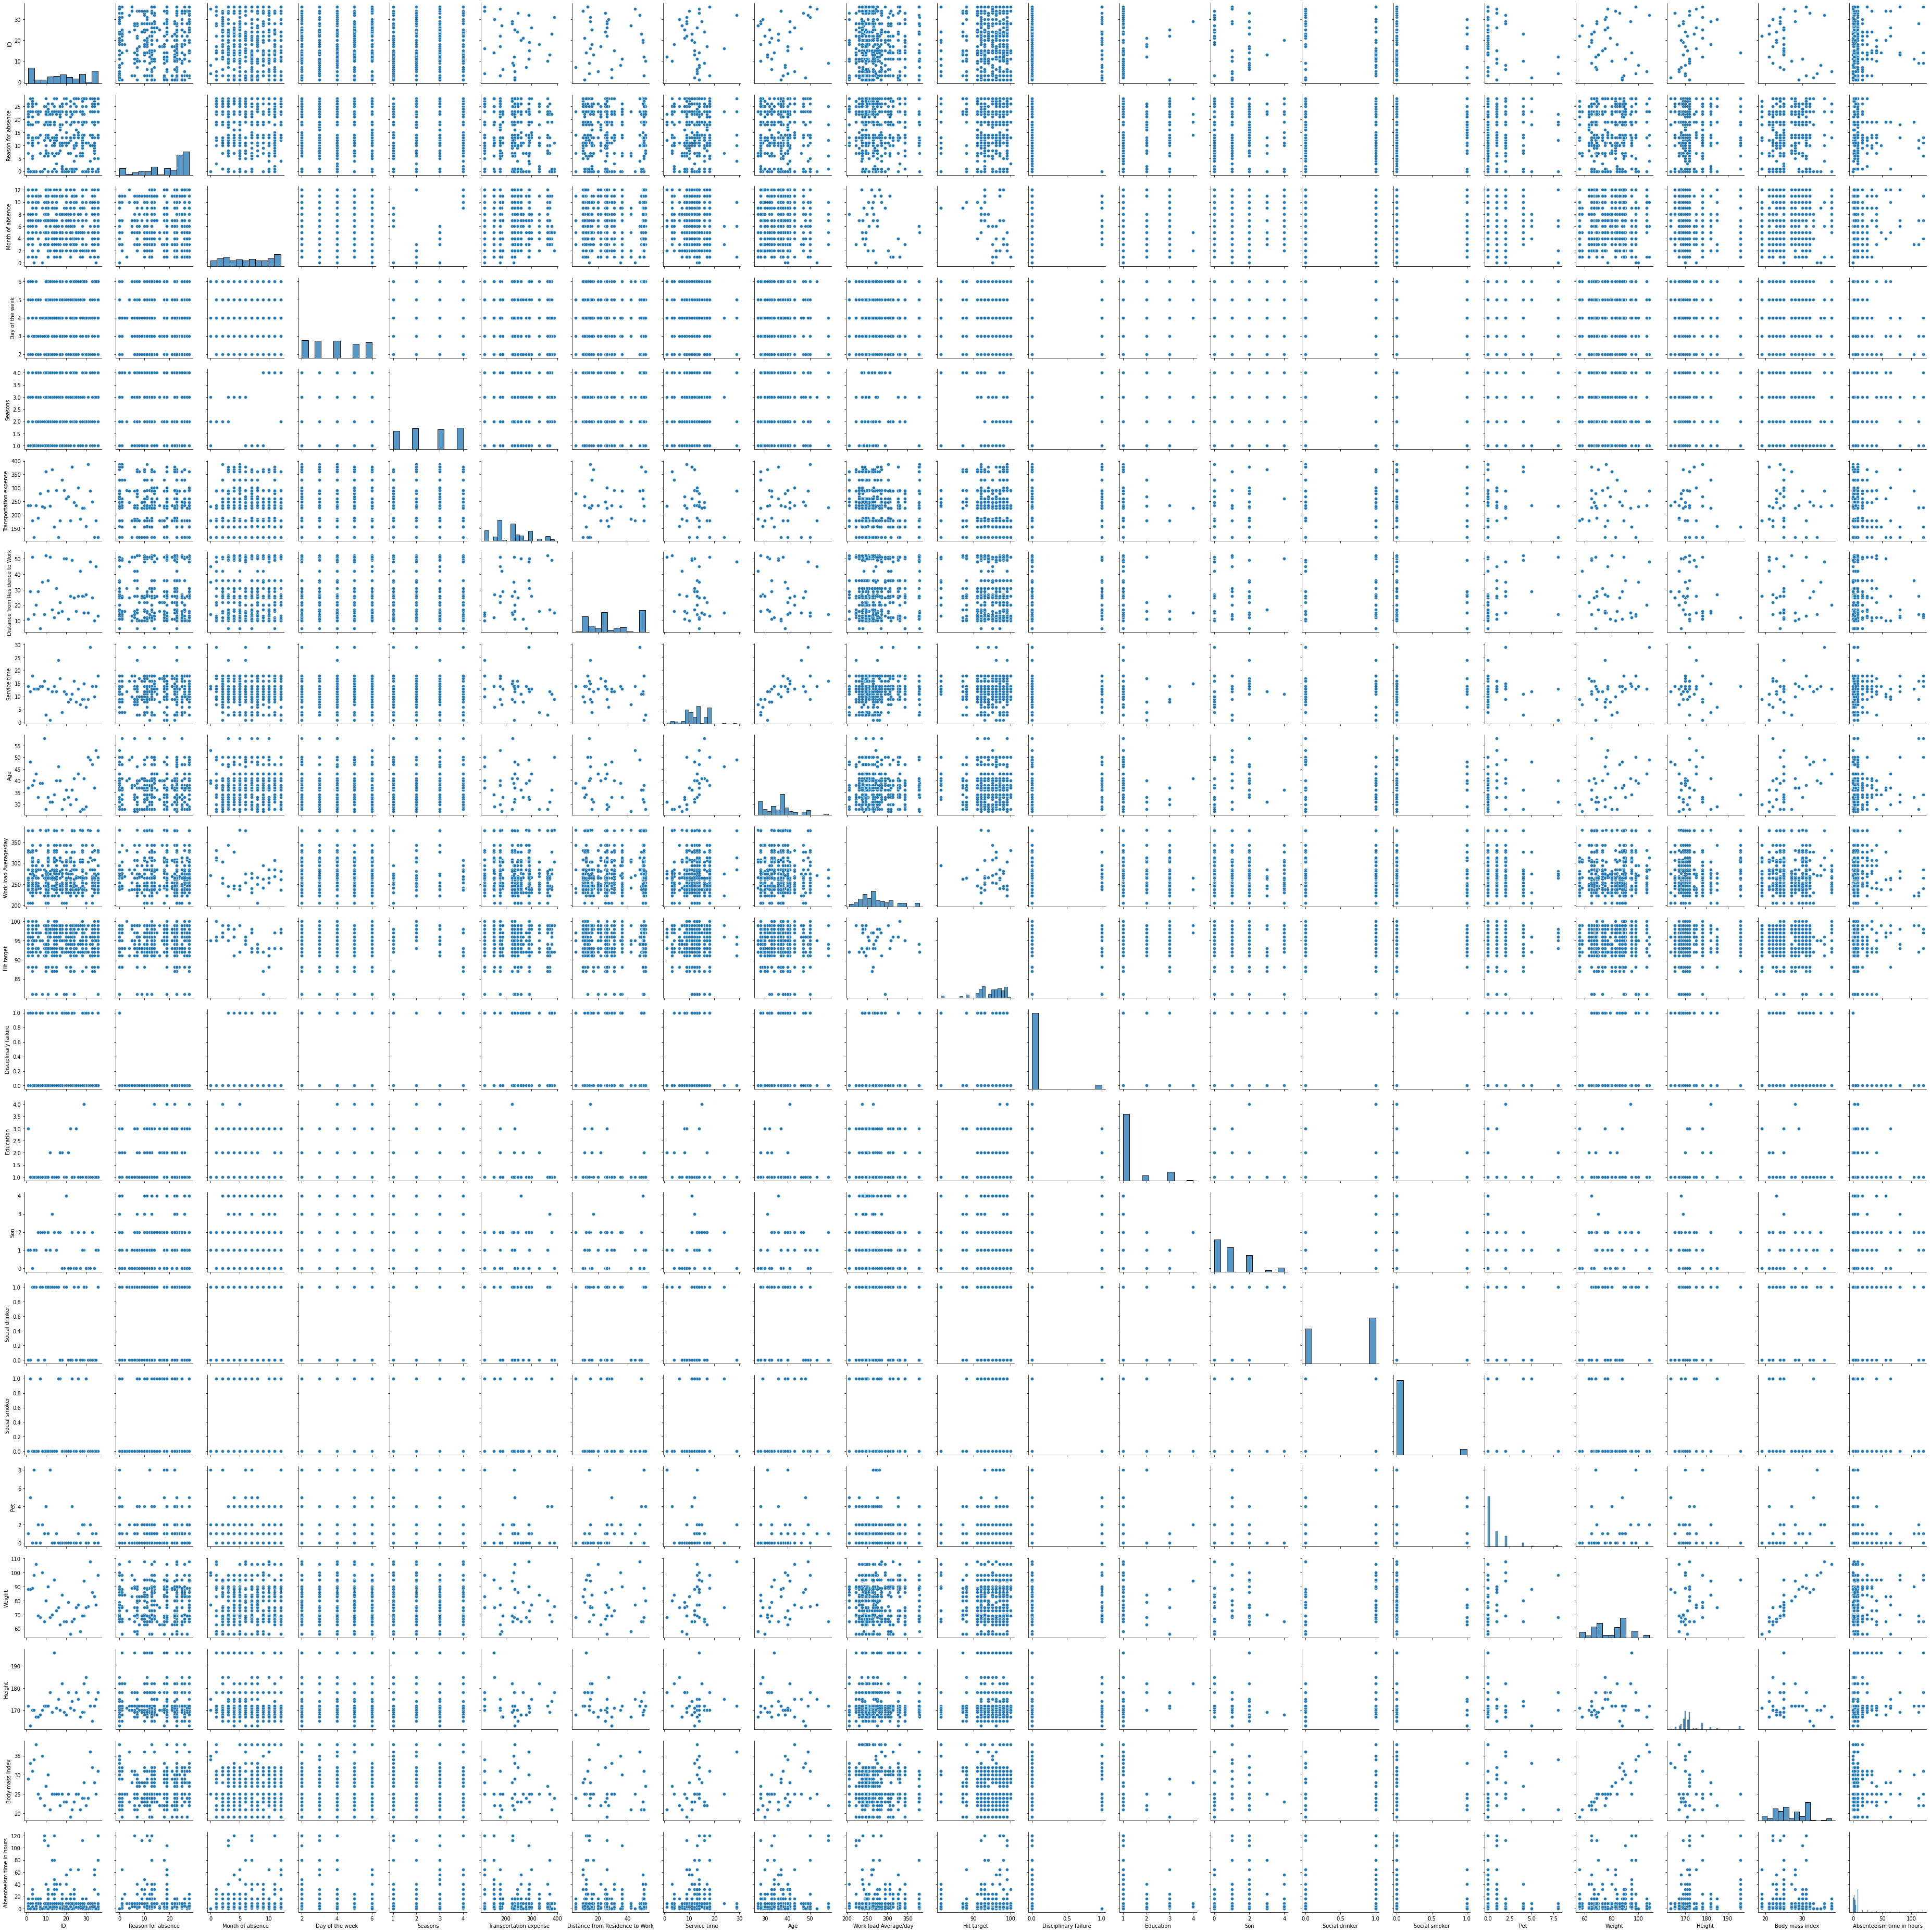

In [7]:
sns.pairplot(data = df)

In [8]:
df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


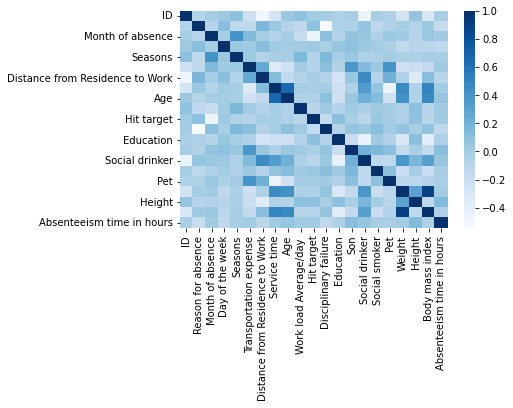

In [9]:
sns.heatmap(scaled_df.corr(), annot = False, cmap = "Blues")

## **K Means Clustering**

With reason for absence

In [10]:
X = scaled_df
WCSS = []
for i in range(1,40):
  kmc = KMeans(n_clusters=i)
  kmc.fit(X)
  WCSS.append(kmc.inertia_)

In [11]:
WCSS

[15539.999999999993,
 13674.906452925694,
 12476.229449598497,
 11549.796098249863,
 10821.984752600638,
 10035.68668637532,
 9399.69779900244,
 8830.167120978902,
 8371.011566768058,
 8051.817137368489,
 7504.2675274794965,
 7336.716882644574,
 7084.645226976547,
 6636.435681919891,
 6422.48432396211,
 6201.993629984991,
 6160.822353852229,
 5882.9016587214555,
 5714.7167884069495,
 5643.735733264904,
 5468.328727176702,
 5352.312810847225,
 5217.477059204179,
 5116.204472120366,
 5009.6529587535115,
 4918.20995272571,
 4836.400385805558,
 4760.30144691735,
 4584.369414204158,
 4529.875012312218,
 4512.11749326314,
 4391.024502379011,
 4279.884759064555,
 4308.8020432441845,
 4202.19764349044,
 4129.002020459616,
 4027.3090446775896,
 3910.5880882425176,
 3938.182518477583]

Plotting elbow curve

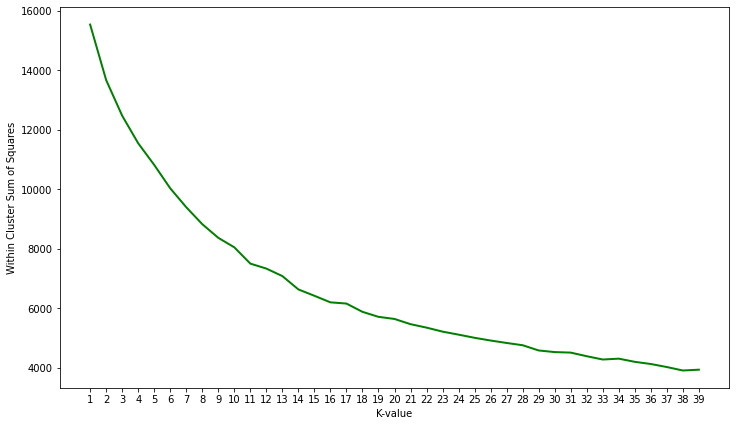

In [12]:
plt.figure(figsize = (12,7))
plt.plot(range(1,40), WCSS, linewidth = 2, color = "green")
plt.xlabel("K-value")
plt.ylabel("Within Cluster Sum of Squares")
plt.xticks(np.arange(1,40))
plt.show()

In [13]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import kneed
from kneed import KneeLocator
kn = KneeLocator(range(1,40), WCSS, curve='convex', direction='decreasing')
print(kn.knee)

14


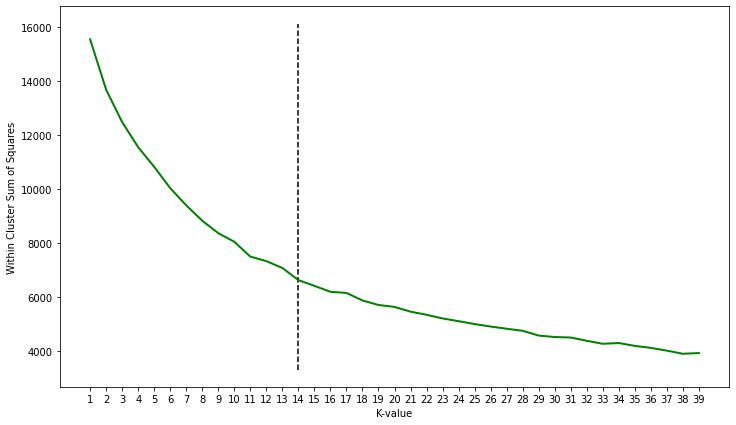

In [15]:
plt.figure(figsize = (12,7))
plt.plot(range(1,40), WCSS, linewidth = 2, color = "green")
plt.xlabel("K-value")
plt.ylabel("Within Cluster Sum of Squares")
plt.xticks(np.arange(1,40))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

Without reason for absence

In [16]:
X2 = scaled_sec_df
WCSS1 = []
for i in range(1,40):
  kmc = KMeans(n_clusters=i)
  kmc.fit(X2)
  WCSS1.append(kmc.inertia_)

In [17]:
WCSS1

[14799.999999999996,
 12937.659913815243,
 11740.304620077375,
 10833.547173833944,
 10061.22505936289,
 9514.702593980368,
 8880.623345235503,
 8262.533994548177,
 8002.208040489339,
 7624.044102957622,
 7211.099285263494,
 6946.998659817931,
 6681.7576906581435,
 6461.194574681047,
 5972.058065301902,
 5815.739255480615,
 5606.156235894859,
 5509.0640443939565,
 5315.221498477222,
 5092.542394060425,
 4966.043089429759,
 4876.660784875478,
 4727.522278981335,
 4617.057732406265,
 4531.4152120914105,
 4426.227219955025,
 4340.331511792761,
 4282.543349750365,
 4195.976385945523,
 4102.326920947766,
 3970.1076884638305,
 3904.412551731655,
 3807.10959763711,
 3704.272492112672,
 3714.0823932970816,
 3696.285353383434,
 3612.2048560521753,
 3578.7011692992855,
 3444.1206399533276]

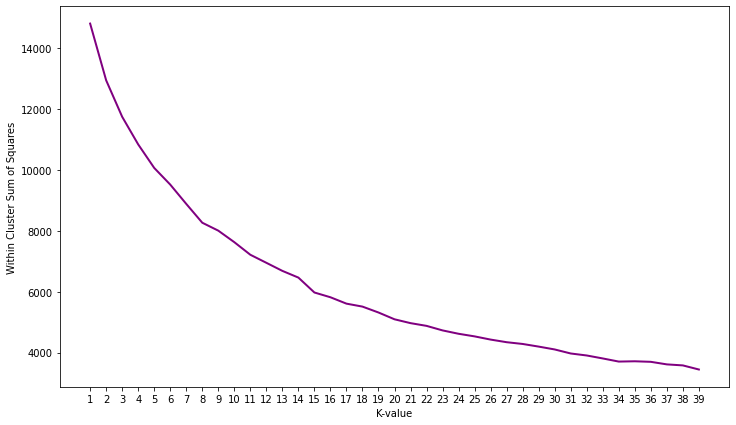

In [18]:
plt.figure(figsize = (12,7))
plt.plot(range(1,40), WCSS1, linewidth = 2, color = "purple")
plt.xlabel("K-value")
plt.ylabel("Within Cluster Sum of Squares")
plt.xticks(np.arange(1,40))
plt.show()

In [19]:
import kneed
from kneed import KneeLocator
kn = KneeLocator(range(1,40), WCSS1, curve='convex', direction='decreasing')
print(kn.knee)

15


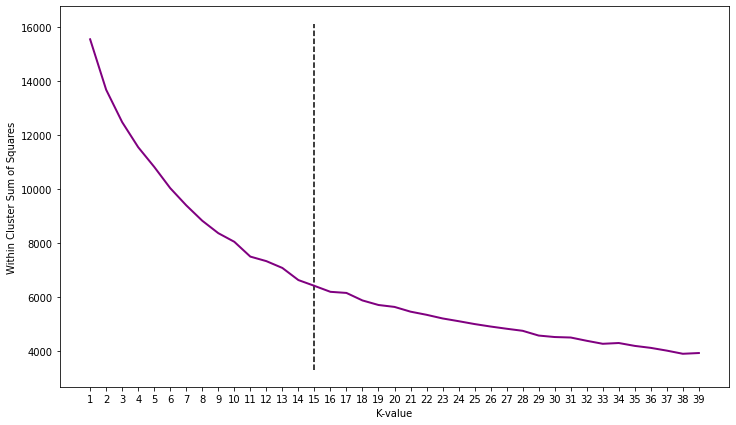

In [20]:
plt.figure(figsize = (12,7))
plt.plot(range(1,40), WCSS, linewidth = 2, color = "purple")
plt.xlabel("K-value")
plt.ylabel("Within Cluster Sum of Squares")
plt.xticks(np.arange(1,40))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

Since Weight and Body mass index have highest correlation of 90%, we will consider those two features alone for building our model

In [21]:
X3 = pd.concat([scaled_df['Age'], scaled_df['Body mass index']],axis = 1, keys = ['Age' , 'Body mass index'])
X3

,Age,Body mass index
0,-0.532868,0.775932
1,2.092860,1.009438
2,0.239405,1.009438
3,0.393859,-0.625100
4,-0.532868,0.775932
...,...,...
735,-0.532868,0.775932
736,0.084950,0.542427
737,0.548314,1.709954
738,0.393859,1.943459


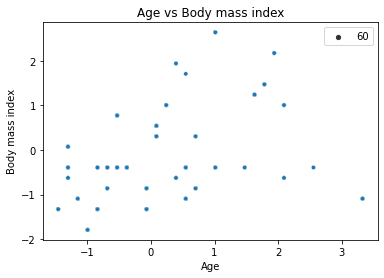

In [22]:
sns.scatterplot(data=X3, x="Age", y="Body mass index", size = 60)
plt.xlabel('Age')
plt.ylabel('Body mass index')
plt.title('Age vs Body mass index')
plt.show()

In [23]:
WCSS2 = []
for i in range(1,30):
  kmc = KMeans(n_clusters=i)
  kmc.fit(X3)
  WCSS2.append(kmc.inertia_)

In [24]:
WCSS2

[1480.0000000000014,
 746.2737432536397,
 507.07917590752413,
 314.4374864691325,
 241.3546350758422,
 172.15267156292458,
 128.0994332579723,
 98.9560008442069,
 77.0780168545861,
 61.80031332791894,
 49.16336266959914,
 39.97293453918256,
 32.86756986509546,
 27.771115436342015,
 22.900621227781457,
 18.728175760499965,
 15.022609657744395,
 12.97319401278704,
 11.80852800144023,
 9.355925635544159,
 7.890299400559261,
 6.824725459370173,
 5.479367894774276,
 4.5950877192286885,
 3.430421707881871,
 2.9055977280659597,
 2.2000085886406744,
 1.6751846088247637,
 1.270519827123386]

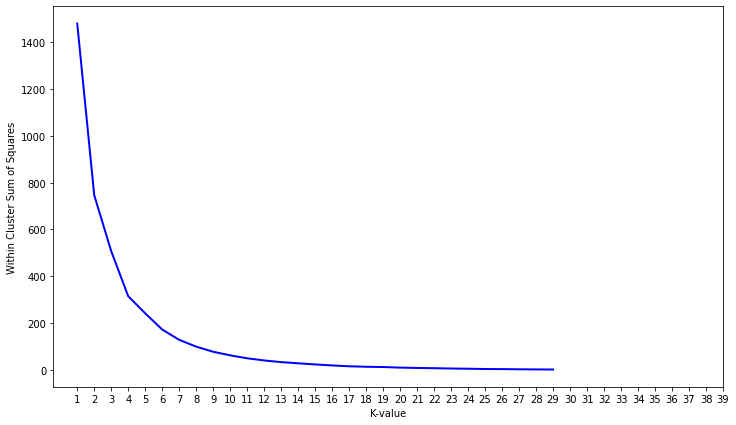

In [25]:
plt.figure(figsize = (12,7))
plt.plot(range(1,30), WCSS2, linewidth = 2, color = "blue")
plt.xlabel("K-value")
plt.ylabel("Within Cluster Sum of Squares")
plt.xticks(np.arange(1,40))
plt.show()

In [26]:
import kneed
from kneed import KneeLocator
kn = KneeLocator(range(1,30), WCSS2, curve='convex', direction='decreasing')
print(kn.knee)

6


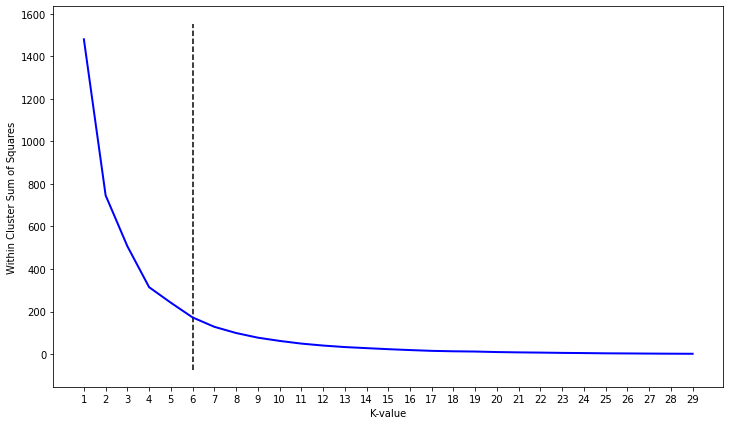

In [27]:
plt.figure(figsize = (12,7))
plt.plot(range(1,30), WCSS2, linewidth = 2, color = "blue")
plt.xlabel("K-value")
plt.ylabel("Within Cluster Sum of Squares")
plt.xticks(np.arange(1,30))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

Comparing performance between "without reason for absence" and "Age and Body mass index" models

In [28]:
kmc = KMeans(n_clusters=15)
kmc.fit(X2)
X1_clusters = kmc.labels_
actual_label = df['Reason for absence']


In [29]:
from sklearn.metrics.cluster import adjusted_rand_score
print("Adjusted rand score")
adjusted_rand_score(X1_clusters,actual_label)

Adjusted rand score


0.09248610213828443

In [30]:
kmc = KMeans(n_clusters=6)
kmc.fit(X3)
X2_clusters = kmc.labels_

In [31]:
print("Adjusted rand score")
adjusted_rand_score(X2_clusters,actual_label)

Adjusted rand score


0.038342699167534744

## **Hierarichal** **Clustering**

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

The dendrogram for various linkage methods:

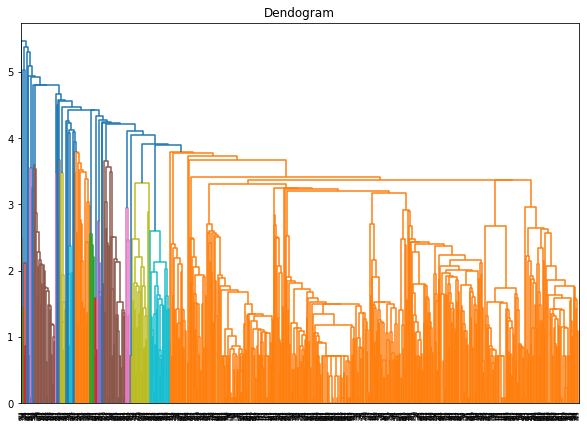

In [37]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')

linkage_method = linkage(scaled_sec_df, method = 'single', metric = 'euclidean')
Dendogram = dendrogram(linkage_method)


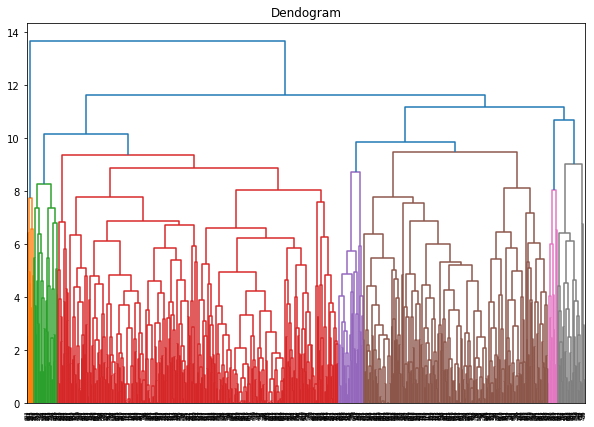

In [38]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')

linkage_method = linkage(scaled_sec_df, method = 'complete', metric = 'euclidean')
Dendogram = dendrogram(linkage_method)


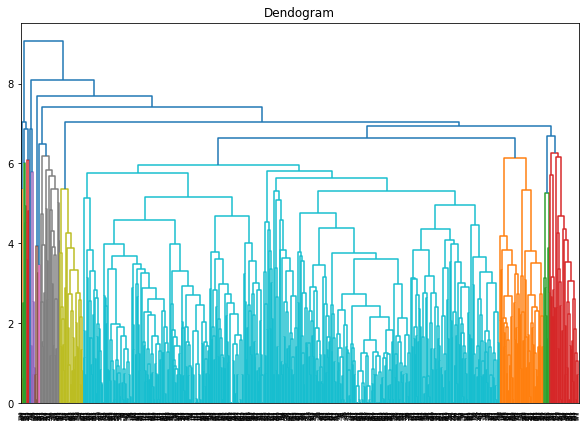

In [39]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')

linkage_method = linkage(scaled_sec_df, method = 'average', metric = 'euclidean')
Dendogram = dendrogram(linkage_method)

In [41]:
print("K  Rand Score")
for i in range(2,14):
  hc = AgglomerativeClustering(n_clusters = i, linkage = 'complete', affinity = 'euclidean')
  hc.fit(scaled_sec_df)
  clusters = hc.labels_
  print(i, "  ", adjusted_rand_score(clusters,actual_label))


K  Rand Score
2    0.0029998201245383343
3    0.010908797759416979
4    0.019540021459860397
5    0.019429683124463498
6    0.03960567836505364
7    0.04013435050561759
8    0.049980050740391926
9    0.05042588915108559
10    0.05065982874143407
11    0.05888827702371237
12    0.059019201561487225
13    0.052186854863728774
